<h1> 1 Installing Libraries </h1>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output
%matplotlib inline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier, SGDRegressor

import os
import gc

import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup

import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output
%matplotlib inline
import os
import gc

import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
from fuzzywuzzy import fuzz
from sklearn.manifold import TSNE

from os import path
from PIL import Image

In [4]:
drug_train_data = pd.read_csv(r"C:\Users\user\OneDrive\Documents\Neuranceai\dataset\train.csv")
drug_train_data.head(2)  

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27,8.022969
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192,7.858458


In [5]:
drug_train_data.loc[:, ["effectiveness_rating", "base_score"]]

,effectiveness_rating,base_score
0,9,8.022969
1,8,7.858458
2,5,6.341969
3,9,6.590176
4,2,6.144782
...,...,...
32160,9,6.963020
32161,6,0.899076
32162,9,6.241812
32163,8,7.940428


In [6]:
print("Number of data points:",drug_train_data.shape[0])

# no of records in a dataset  
print("Number of Attributes :",drug_train_data.shape[1])

Number of data points: 32165
Number of Attributes : 8


Means Our dataset has 32165 record

and 8 Columns

In Which base_score is our Target variable

In [7]:
# sort on the basis of "drug_approved_by_UIC" coulmn
drug_train_data = drug_train_data.sort_values('drug_approved_by_UIC')
drug_train_data.loc[:, "drug_approved_by_UIC"]

10091    1-Apr-08
1009     1-Apr-08
1050     1-Apr-08
13736    1-Apr-08
13751    1-Apr-08
           ...   
920      9-Sep-17
1364     9-Sep-17
27948    9-Sep-17
11170    9-Sep-17
13362    9-Sep-17
Name: drug_approved_by_UIC, Length: 32165, dtype: object

In [8]:
drug_train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32165 entries, 10091 to 13362
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   patient_id                  32165 non-null  int64  
 1   name_of_drug                32165 non-null  object 
 2   use_case_for_drug           32165 non-null  object 
 3   review_by_patient           32165 non-null  object 
 4   effectiveness_rating        32165 non-null  int64  
 5   drug_approved_by_UIC        32165 non-null  object 
 6   number_of_times_prescribed  32165 non-null  int64  
 7   base_score                  32165 non-null  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 2.2+ MB


<h1>2 Analysis of features </h1>

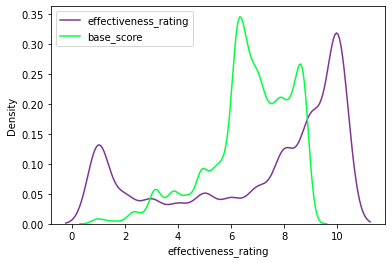

In [9]:
sns.kdeplot(drug_train_data["effectiveness_rating"], color="#7C3794", label='effectiveness_rating')
sns.kdeplot(drug_train_data["base_score"], color="#00ff40", label='base_score')
plt.legend()

<AxesSubplot:xlabel='number_of_times_prescribed', ylabel='Count'>

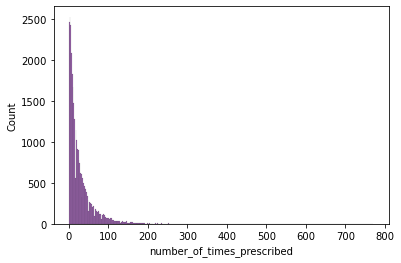

In [11]:
sns.histplot(drug_train_data["number_of_times_prescribed"], color="#7C3794")

In [12]:
drug_train_data["number_of_times_prescribed"]

10091     15
1009      19
1050     357
13736     12
13751     11
        ... 
920        4
1364       1
27948      8
11170      5
13362     21
Name: number_of_times_prescribed, Length: 32165, dtype: int64

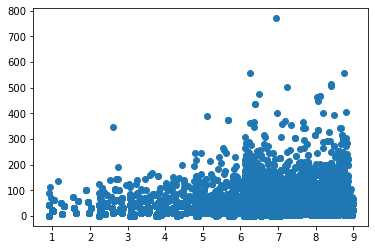

In [13]:
plt.scatter(drug_train_data["base_score"], drug_train_data["number_of_times_prescribed"])

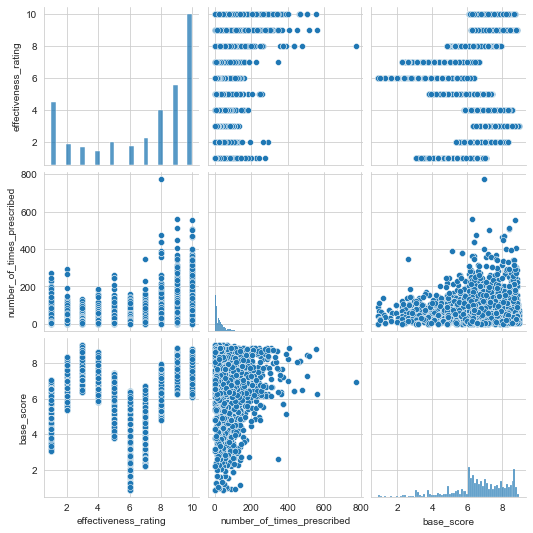

In [14]:
sns.set_style("whitegrid")
sns.pairplot(data = drug_train_data[["effectiveness_rating", "number_of_times_prescribed", "base_score"]], kind="scatter")
plt.show()

In [15]:
# sns.set_style("whitegrid")
# sns.pairplot(data = drug_train_data[["effectiveness_rating", "number_of_times_prescribed", "base_score"]], kind="kde")
# plt.show()

In [16]:
qids = pd.Series(drug_train_data['name_of_drug'].tolist())
unique_qs = len(np.unique(qids))
unique_qs

2220

In [17]:
name_of_drug = pd.Series(drug_train_data['name_of_drug'].tolist())
unique_drugs = len(np.unique(name_of_drug))
print ('Total number of  Unique Questions are: {}\n'.format(unique_drugs))

print ('Max number of times a single question is repeated: {}\n'.format(max(name_of_drug.value_counts()))) 

drug_vals=name_of_drug.value_counts()
print(drug_vals)

drug_vals=drug_vals.values

Total number of  Unique Questions are: 2220

Max number of times a single question is repeated: 724

Levonorgestrel                                         724
Etonogestrel                                           628
Ethinyl estradiol / norethindrone                      547
Ethinyl estradiol / norgestimate                       425
Nexplanon                                              397
                                                      ... 
Pimtrea                                                  1
Ogestrel-28                                              1
Chlorpheniramine / dextromethorphan / phenylephrine      1
Aldara                                                   1
Vibramycin                                               1
Length: 2220, dtype: int64


Maximum number of times a single question is repeated: 724



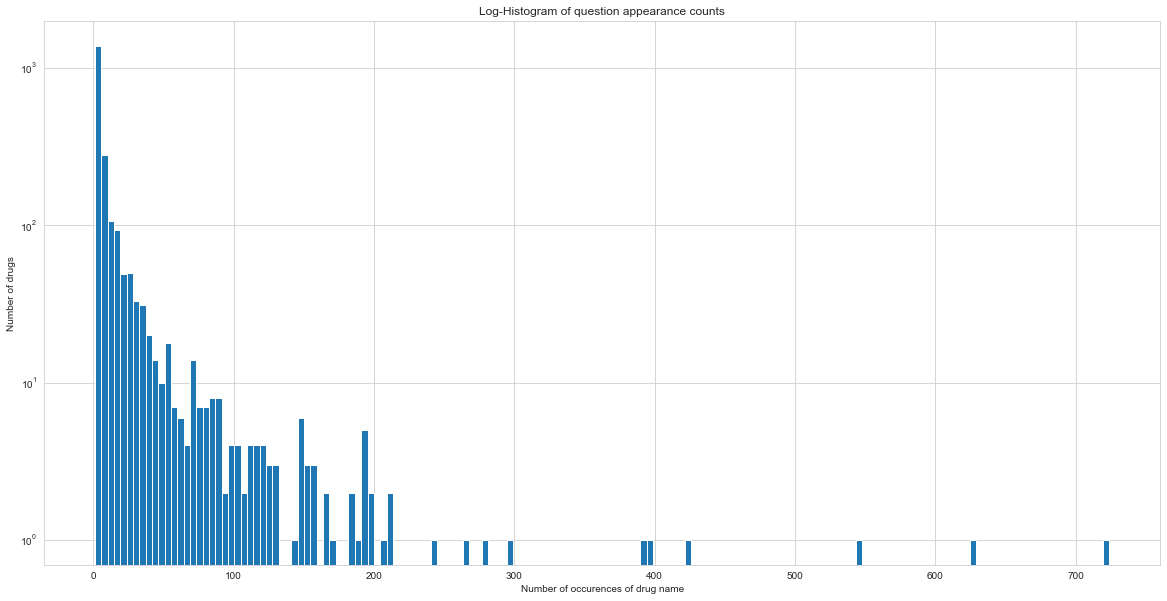

In [18]:
plt.figure(figsize=(20, 10))
plt.hist(name_of_drug.value_counts(), bins=160)
plt.yscale('log', nonpositive='clip')
plt.title('Log-Histogram of question appearance counts')
plt.xlabel('Number of occurences of drug name')
plt.ylabel('Number of drugs')
print ('Maximum number of times a single question is repeated: {}\n'.format(max(name_of_drug.value_counts()))) 

In [19]:
use_case_drug = pd.Series(drug_train_data['use_case_for_drug'].tolist())
unique_use_case_drugs = len(np.unique(use_case_drug))
print ('Total number of  Unique Questions are: {}\n'.format(unique_use_case_drugs))

print ('Max number of times a single question is repeated: {}\n'.format(max(use_case_drug.value_counts()))) 

use_case_drug_vals=use_case_drug.value_counts()
print(use_case_drug_vals)

use_case_drug_vals=use_case_drug_vals.values

Total number of  Unique Questions are: 636

Max number of times a single question is repeated: 5795

Birth Control                                   5795
Depression                                      1791
Pain                                            1273
Anxiety                                         1174
Acne                                            1101
                                                ... 
Hypotension                                        1
amilial Mediterranean Feve                         1
Anemia Associated with Chronic Renal Failure       1
Nasal Carriage of Staphylococcus aureus            1
Osteolytic Bone Lesions of Multiple Myeloma        1
Length: 636, dtype: int64


Maximum number of times a single question is repeated: 5795



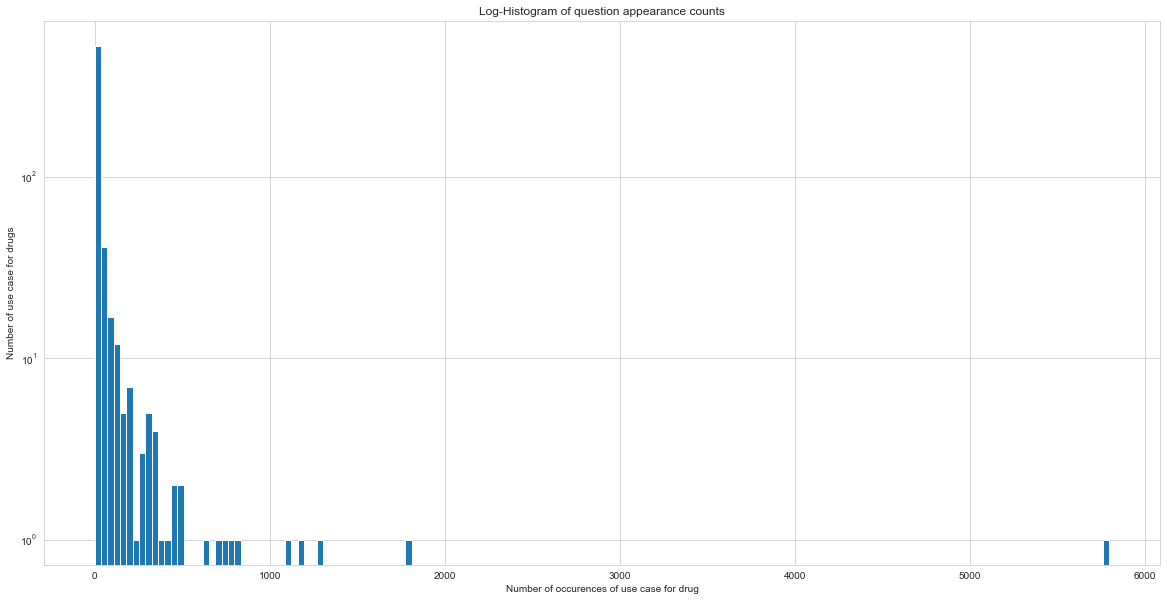

In [20]:
plt.figure(figsize=(20, 10))
plt.hist(use_case_drug.value_counts(), bins=160)
plt.yscale('log', nonpositive='clip')
plt.title('Log-Histogram of question appearance counts')
plt.xlabel('Number of occurences of use case for drug')
plt.ylabel('Number of use case for drugs')
print ('Maximum number of times a single question is repeated: {}\n'.format(max(use_case_drug.value_counts()))) 

In [21]:
# review_by_patient
drug_train_data['review_len'] = drug_train_data['review_by_patient'].str.len()
drug_train_data['review_n_words'] = drug_train_data['review_by_patient'].apply(lambda row: len(row.split(" ")))
drug_train_data.head(2) 

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score,review_len,review_n_words
10091,223808,Depakote ER,Epilepsy,"""After trying 4 different meds this one was th...",8,1-Apr-08,15,7.633384,370,74
1009,35602,Anexsia,Pain,"""Worked better than Tylenol w/codeine #3 and C...",10,1-Apr-08,19,6.127475,88,14


<h1>3 Preprocessing of Text </h1>

- Preprocessing:
    - Removing html tags 
    - Removing Punctuations
    - Performing stemming
    - Removing Stopwords
    - Expanding contractions etc.

In [24]:
# To get the results in 4 decemal points
SAFE_DIV = 0.0001 

STOP_WORDS = stopwords.words("english")
stopword = set(STOP_WORDS)
stopword.add("said")
stopword.add("br")
stopword.add(" ")
stopword.remove("not")
stopword.remove("no")


def preprocess(x):
    x = str(x).lower()
    x = x.replace(",000,000", "m").replace(",000", "k").replace("′", "'").replace("’", "'")\
                           .replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")\
                           .replace("n't", " not").replace("what's", "what is").replace("it's", "it is")\
                           .replace("'ve", " have").replace("i'm", "i am").replace("'re", " are")\
                           .replace("he's", "he is").replace("she's", "she is").replace("'s", " own")\
                           .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")\
                           .replace("€", " euro ").replace("'ll", " will").replace("asap", "as soon as possible")
    x = re.sub(r"([0-9]+)000000", r"\1m", x)
    x = re.sub(r"([0-9]+)000", r"\1k", x)
    
    
    porter = PorterStemmer()
    pattern = re.compile('\W')
    
    if type(x) == type(''):
        x = re.sub(pattern, ' ', x)
    
    
    if type(x) == type(''):
        x = porter.stem(x)
        example1 = BeautifulSoup(x)
        x = example1.get_text()
               
    return x
preprocess(drug_train_data['review_by_patient'][10091])

'after trying 4 different meds this one was the first i was able to tolerate for a longer period  the seizures came under control and all was well  unfortunatly my amonia levels  a very rare side effect but one that you need to be aware of  began to rise to scary levels so i had to quit as soon as possible  however if i had not had this issue i would have gladly stayed on the drug  '

In [25]:
drug_train_data["review_by_patient_filter"] = drug_train_data['review_by_patient'].fillna("").apply(preprocess)
drug_train_data["review_by_patient_unique_word"] = drug_train_data['review_by_patient_filter'].apply(lambda row: list(set([word for word in row.split() if word not in stopword])))
drug_train_data.head(2)

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score,review_len,review_n_words,review_by_patient_filter,review_by_patient_unique_word
10091,223808,Depakote ER,Epilepsy,"""After trying 4 different meds this one was th...",8,1-Apr-08,15,7.633384,370,74,after trying 4 different meds this one was the...,"[one, gladly, stayed, scary, well, seizures, c..."
1009,35602,Anexsia,Pain,"""Worked better than Tylenol w/codeine #3 and C...",10,1-Apr-08,19,6.127475,88,14,worked better than tylenol w codeine 3 and ca...,"[w, tylenol, 3, better, pain, carisoprodol, wo..."


In [26]:
drug_train_data["len_review_by_patient_unique_word"] = [len(ele) for ele in list(drug_train_data["review_by_patient_unique_word"])]
# plt.figure(figsize=(40, 20))
# plt.scatter(drug_train_data["base_score"], [len(ele) for ele in list(drug_train_data["review_by_patient_unique_word"])], s=1)

In [27]:
# sns.FacetGrid(drug_train_data[["len_review_by_patient_unique_word", "effectiveness_rating"]], hue="effectiveness_rating", height=5).map(sns.distplot, "len_review_by_patient_unique_word").add_legend()
# plt.show()

In [28]:
for i in range(0, 11):
    print(f'rating {i} mean words --> {drug_train_data[drug_train_data["effectiveness_rating"] == i].number_of_times_prescribed.mean()}')

rating 0 mean words --> nan
rating 1 mean words --> 15.240745052386496
rating 2 mean words --> 16.088607594936708
rating 3 mean words --> 15.783741120757695
rating 4 mean words --> 15.737154150197629
rating 5 mean words --> 16.80392156862745
rating 6 mean words --> 20.187742435996896
rating 7 mean words --> 23.141921397379914
rating 8 mean words --> 29.1040676175383
rating 9 mean words --> 34.34905139067968
rating 10 mean words --> 37.189816621147095


In [29]:
for i in range(0, 11):
    print(f'rating {i} mean words --> {drug_train_data[drug_train_data["effectiveness_rating"] == i].review_len.mean()}')

rating 0 mean words --> nan
rating 1 mean words --> 431.43888242142026
rating 2 mean words --> 456.8762306610408
rating 3 mean words --> 463.4719810576164
rating 4 mean words --> 454.0128458498024
rating 5 mean words --> 468.7153700189753
rating 6 mean words --> 473.2498060512025
rating 7 mean words --> 482.8700873362445
rating 8 mean words --> 482.4675118858954
rating 9 mean words --> 472.6468962976607
rating 10 mean words --> 443.8285212641436


In [30]:
for i in range(0, 11):
    print(f'rating {i} mean words --> {drug_train_data[drug_train_data["effectiveness_rating"] == i].review_n_words.mean()}')

rating 0 mean words --> nan
rating 1 mean words --> 80.23166472642608
rating 2 mean words --> 84.82700421940929
rating 3 mean words --> 86.24625098658248
rating 4 mean words --> 84.63142292490119
rating 5 mean words --> 87.05502846299811
rating 6 mean words --> 88.277734678045
rating 7 mean words --> 90.1457423580786
rating 8 mean words --> 89.92525092445854
rating 9 mean words --> 88.15490882298766
rating 10 mean words --> 83.24473273507608


In [31]:
for i in range(0, 11):
    print(f'rating {i} mean words --> {drug_train_data[drug_train_data["effectiveness_rating"] == i].len_review_by_patient_unique_word.mean()}')

rating 0 mean words --> nan
rating 1 mean words --> 36.57951105937136
rating 2 mean words --> 38.70604781997187
rating 3 mean words --> 38.767166535122335
rating 4 mean words --> 38.3201581027668
rating 5 mean words --> 39.350411132194814
rating 6 mean words --> 40.01086113266098
rating 7 mean words --> 40.54093886462882
rating 8 mean words --> 40.561278394083466
rating 9 mean words --> 39.830355498250135
rating 10 mean words --> 37.838470542333205


In [32]:
drug_train_data.to_csv("drug_preprocess.csv")

In [33]:
drug_train_data.head(2)

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score,review_len,review_n_words,review_by_patient_filter,review_by_patient_unique_word,len_review_by_patient_unique_word
10091,223808,Depakote ER,Epilepsy,"""After trying 4 different meds this one was th...",8,1-Apr-08,15,7.633384,370,74,after trying 4 different meds this one was the...,"[one, gladly, stayed, scary, well, seizures, c...",35
1009,35602,Anexsia,Pain,"""Worked better than Tylenol w/codeine #3 and C...",10,1-Apr-08,19,6.127475,88,14,worked better than tylenol w codeine 3 and ca...,"[w, tylenol, 3, better, pain, carisoprodol, wo...",10


<h1>4 Test Data </h1>

In [34]:
drug_test_data = pd.read_csv(r"C:\Users\user\OneDrive\Documents\Neuranceai\dataset\test.csv")
drug_test_data.head(2)  

,patient_id,name_of_drug,review_by_patient,drug_approved_by_UIC,number_of_times_prescribed,use_case_for_drug,effectiveness_rating
0,163740,Mirtazapine,"""I&#039;ve tried a few antidepressants over th...",28-Feb-12,22,Depression,10
1,39293,Contrave,"""Contrave combines drugs that were used for al...",5-Mar-17,35,Weight Loss,9


In [44]:
# review_by_patient
drug_test_data['review_len'] = drug_test_data['review_by_patient'].str.len()
drug_test_data['review_n_words'] = drug_test_data['review_by_patient'].apply(lambda row: len(row.split(" ")))
drug_test_data.head(2)

,patient_id,name_of_drug,review_by_patient,drug_approved_by_UIC,number_of_times_prescribed,use_case_for_drug,effectiveness_rating,review_by_patient_filter,review_by_patient_unique_word,len_review_by_patient_unique_word,review_len,review_n_words
0,163740,Mirtazapine,"""I&#039;ve tried a few antidepressants over th...",28-Feb-12,22,Depression,10,i 039 ve tried a few antidepressants over the...,"[insomnia, changed, tried, actually, effects, ...",36,439,68
1,39293,Contrave,"""Contrave combines drugs that were used for al...",5-Mar-17,35,Weight Loss,9,contrave combines drugs that were used for alc...,"[work, want, contrave, know, obesity, habits, ...",62,782,143


In [45]:
drug_test_data["review_by_patient_filter"] = drug_test_data['review_by_patient'].fillna("").apply(preprocess)
drug_test_data["review_by_patient_unique_word"] = drug_test_data['review_by_patient_filter'].apply(lambda row: list(set([word for word in row.split() if word not in stopword])))
drug_test_data.head(2)

,patient_id,name_of_drug,review_by_patient,drug_approved_by_UIC,number_of_times_prescribed,use_case_for_drug,effectiveness_rating,review_by_patient_filter,review_by_patient_unique_word,len_review_by_patient_unique_word,review_len,review_n_words
0,163740,Mirtazapine,"""I&#039;ve tried a few antidepressants over th...",28-Feb-12,22,Depression,10,i 039 ve tried a few antidepressants over the...,"[insomnia, changed, tried, actually, effects, ...",36,439,68
1,39293,Contrave,"""Contrave combines drugs that were used for al...",5-Mar-17,35,Weight Loss,9,contrave combines drugs that were used for alc...,"[work, want, contrave, know, obesity, habits, ...",62,782,143


In [46]:
drug_test_data["len_review_by_patient_unique_word"] = [len(ele) for ele in list(drug_test_data["review_by_patient_unique_word"])]
# plt.figure(figsize=(40, 20))
# plt.scatter(drug_train_data["base_score"], [len(ele) for ele in list(drug_train_data["review_by_patient_unique_word"])], s=1)

In [47]:
drug_train_data.shape, drug_test_data.shape

((32165, 13), (10760, 12))

In [48]:
drug_test_data.head(2)

,patient_id,name_of_drug,review_by_patient,drug_approved_by_UIC,number_of_times_prescribed,use_case_for_drug,effectiveness_rating,review_by_patient_filter,review_by_patient_unique_word,len_review_by_patient_unique_word,review_len,review_n_words
0,163740,Mirtazapine,"""I&#039;ve tried a few antidepressants over th...",28-Feb-12,22,Depression,10,i 039 ve tried a few antidepressants over the...,"[insomnia, changed, tried, actually, effects, ...",36,439,68
1,39293,Contrave,"""Contrave combines drugs that were used for al...",5-Mar-17,35,Weight Loss,9,contrave combines drugs that were used for alc...,"[work, want, contrave, know, obesity, habits, ...",62,782,143


In [49]:
drug_test_data.to_csv("drug_test_preprocess.csv")